In [3]:
from rich import print

In [3]:
from typing import Union
import ipytest
ipytest.autoconfig()

# Lesson 5: Dictionaries and Functions (and testing)

## A new Python data type: `dict` (dictionary)

A dictionary, or `dict`, is very similar to a `list`:

```python
my_list = ["col300x300", "col400x400", "col500x500", "col600x600"]

# Use an index to lookup and retrieve items in the list
my_list[2] # "col500x500"
my_list[1] # "col400x400"
```

A `dict` is like a `list` but, instead of using an integer index to retrieve an item from the list, you can instead use a **key**.

```python
my_dict = {
    "Roof-L14": "col300x300", # key: value, 
    "L13-L09": "col400x400",
    "L08-L03": "col500x500",
    "L03-P02": "col600x600",
}

# Use the *key* to lookup and retrieve items in the dictionary
my_dict["L13-L09"] # "col400x400"
my_dict["L03-P02"] # "col600x600"
```

### Keys and values

A `dict` is like a list of `key: value,` pairs. Important things to know and remember about `dict`s:

1. Dictionary keys must be _unique_: you cannot have a dictionary with two identical keys and two different values. If you add two elements to the dictionary with the same key, the second "key: value" pair will overwrite the first.
2. Dictionary keys must be _hashable_: "hashable" is a way of saying that the key must be _immutable_. Immutable types in Python include (but are not limited to) `str`, `float`, `int`, `tuple`. Mutable types, which _cannot_ be used as keys, include `list` and `dict`.
3. Dictionary _values_ can be _anything_ including the mutable types such as `list` and `dict`.

> Side note: `tuple`? What is a `tuple`?
>
> A `tuple` is almost identical to a list. To make a `list`, use `[` and `]`. To make a `tuple`, use `(` and `)`.
> 
> A `list` allows you to change, append, and delete items from the list. A `tuple` does not allow you to change, append, or delete anything from the `tuple` after it has been created. Because of this, you _can_ use them as dictionary keys.

### Making, updating, and retrieving `dict` items

1. You can use `{` and `}` to create a `dict` manually, e.g.

    ```python
    sections = {"col_sections": ["col300x300", "col400x400"], "beam_sections": ["b200x600", "b300x800"]}
    ```

2. Or, you can use the `dict()` function and pass _keyword arguments_, e.g.

```python
sections = dict(
    col_sections=["col300x300", "col400x400"], 
    beam_section=["b200x600", "b300x800"]
)
```

> When you pass keyword arguments it is in the form of `key=value`. Note, that when passing keyword arguments, the keys, although they are strings, do not have quotes around them.

2. Update an existing (or empty) `dict` with `.update()`, e.g.

    ```python
    acc = {} # Empty dict
    acc.update({"col_sections": ["col300x300", "col400x400"]}) # Update the dict with another dict
    acc.update({"beam_sections": ["b200x600", "b300x800"]}) # Update the dict with another dict
    ```
> You can also use `.update()` to overwrite the value assigned to a key. e.g.
```python
my_dict = {"col_section": "col300x300"}
my_dict.update({"col_section": "col500x500"})
my_dict # {"col_section": "col500x500"}
```

3. Retrieve items with one of two ways:

    A. Retrieve with indexing:
```python
my_dict = {"col_section": "col300x300"}
my_dict["col_section"] # "col300x300"
my_dict["beam_section"] # Not in dictionary keys. Will cause KeyError.
```

    B. Retrieve with .get() method:
    
```python
my_dict = {"col_section": "col300x300"}
my_dict.get("col_section") # "col300x300"
my_dict.get("beam_section") # Not in dictionary keys. Does NOT cause KeyError. Returns None.
```

### `dict` Methods

Like `list` and `str`, dictionaries come with a variety of useful methods. What follows is an introduction to some of the ones you may find most useful.

#### `.get(key, default=None)`

Retrieve the value for the given key. If the key is not found then return the value given in `default`.

e.g.

```python
my_dict = {"col_section": "col300x300"}
my_dict.get("beam_section", default="beam200x600") # "beam200x600" because "beam_section" is not a key in the dict

my_dict.get("col_section") # "col300x300"
```

#### `.update(d)`

Adds the `key: value` pairs in the dictionary `d` to the dictionary. If the key is already present, the value is set to the new value.

e.g.
```python
my_dict = {"col_section": "col300x300"}
my_dict.update({"beam_section": "beam200x600"}) # This updates my_dict in place. This is possible because a dict is _mutable_.

print(my_dict) # See how my_dict has changed
```

#### `.items()`, `.keys()`, and `.values()`

Used when iterating (i.e. when starting a `for` loop).

* `.keys()` iterates over the dictionary keys
* `.values()` iterates over the dictionary values
* `.items()` iterates over both keys and values

e.g.
```python
my_dict = {"col_section": "col300x300", "beam_section": "beam200x600"}

for key in my_dict.keys():
    print(key)
    
for value in my_dict.values():
    print(value)
    
for key, value in my_dict.items():
    print(key)
    print(value)
```

---

# Functions

In all of our lessons and workbooks so far, we have just been writing code and running it directly in a given cell. This is fine and good for trying things out or writing a short script to just do one or two things. 

But, going beyond just scripts, how do you write a *program*?

A main focus of this course is on how to write structured and flexible *programs* that you can use over and over again in your work. By understanding how to structure programs, you will quickly gain confidence in your programming ability.

Programs all start with **functions**.

## What is a function?

A function is a small piece of code that describes a _process_ and is assigned a name. 

Our previous workbook exercise was just code written in Jupyter cells. If you wanted to run that code in multiple places, you would have to copy and paste the cell. 

A function allows you to write some code once, and use it multiple times by just calling its name, like this:

```python
def vector_add(v1: list[float], v2: list[float]) -> list[float]:
    """
    Returns a list representing the vector sum of the lists 'v1' and 'v2'.
    Both 'v1' and 'v2' must be the same length and must contain only numbers,
    either float or int.
    """
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
    return v_result
```

Now that the function has been defined it can be used later in the code and in multiple places:

```python
column_loads_roof = [32.3, 0., 24.2] # DL, LL, SL
column_loads_l06 = [39.7, 55.0, 0.] # DL, LL, SL

column_loads_l05 = vector_add(column_loads_roof, column_loads_l06)
```

## Components of a function:

We are going to break down the parts of this function:
```python
def vector_add(v1: list[float], v2: list[float]) -> list[float]:
    """
    Returns a list representing the vector sum of the lists 'v1' and 'v2'.
    Both 'v1' and 'v2' must be the same length and must contain only numbers,
    either float or int.
    """
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
    return v_result
```


### 1. The "signature":

```python
def vector_add(v1: list[float], v2: list[float]) -> list[float]:
```
Use the `def` keyword, we _define_ the name of the function. 

A complete function signature includes:
* The name of the function
* The arguments it takes
* The types of the arguments
* The type of the output, or _return_, value

A good function signature should be able to tell us most of what we need to know about the function without _having_ to read the docstring.

**Everything that follows the signature is indented. This signifies that everything that follows is in the scope of the function.**

### 2. The "doc string":
```python
    """
    Returns a list representing the vector sum of the lists 'v1' and 'v2'.
    Both 'v1' and 'v2' must be the same length and must contain only numbers,
    either float or int.
    """
```
The doc string is just a `str` written with three quotes (`"""`, used for multi-line strings) that tells us what the function does. We can read the doc string of any function in python by typing `help(<function name>)`. e.g. We could type `help(loud_string)` to see the doc string of our function here.

### 3. The "implementation":
```python
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
```
The implementation is what we call the actual lines of code in the function. We call it this because it is the implementation of the *idea* or *purpose* of the function. Often times, there are many ways to implement any given function. The way that it is written is just the _current implementation_.

### 4. The `return`
```python
return v_result
```
`return` is a special keyword in Python that only has meaning inside of a function. If you try using `return` in your code outside of a function, Python will give you `SyntaxError: 'return' outside function`.

**The `return` keyword tells the Python to do two things:**

1. Terminate the function
2. Evaluate the _expression_ beside the `return` keyword and pass its value from inside the function scope to the outside "calling" scope.

#### Wait! What happens if I forget to put the `return` statement???

If you forget to put the `return` statement in, your function will still end at the last line. No big deal. All functions will return something whether you put the `return` statement there or not. 

What will it return if you do not tell it what to return? It will return `None`.

## Function arguments: positional and keyword

### Positional arguments

In the function signature, we specify the function _arguments_. 

```python
def my_func(param_1: type, param_2: type) -> type:
```

This function signature describes two _positional_ arguments. When the function is called, the function knows the difference between `param_1` and `param_2` because of their positions:

```python
a=1
b=2
my_func(a, b) # a is passed as param_1, b is passed as param_2
```

We could also called the function by explicitily saying which value is going to which argument. In so doing, we would say that we are passing _keyword arguments_:

```python
a=1
b=2
my_func(param_1=a, param_2=b)

# When passing arguments as positional arguments, you can do so in any order
my_func(param_2=b, param_1=a) # This is the same
```

### Keyword arguments

We can also explicitly set certain arguments in the function signature as _keyword arguments_ which allows us to set _default values_ for the arguments:

```python
def my_func(param_1: type = 100, param_2: type = 0) -> type:
```

Now, because `my_func` is defined with two keyword arguments and, because they have default values, they become _optional_ arguments. You do not need to pass any new arguments to call the function.

```python
my_func() # param_1 is 100, param_2 is 0
```

When calling the function, you can pass alternate values to `param_1` and `param_2` as _either_ positional or keyword arguments:

```python
my_func(40) # param_1 is 40, param_2 is 0
my_func(param_2=54) # param_1 is 100, param_2 is 54
my_func(40, 54) # param_1 is 40, param_2 is 54
my_func(param_2=32, param_1=16) # etc.
```

## Function scope vs global scope

Consider that, for this function, we have defined the following variable names _within_ the function scope: `v1`, `v2`, `v_result`, `idx`, `item`, and `new_item` (in that order).

```python
def vector_add(v1: list[float], v2: list[float]) -> list[float]:
    """
    Returns a list representing the vector sum of the lists 'v1' and 'v2'.
    Both 'v1' and 'v2' must be the same length and must contain only numbers,
    either float or int.
    """
    # Indented means we are within the function scope and have access to the variables
    # defined within the function scope.
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
    return v_result

# Outside the function scope, we do NOT have access to the variable names defined within the function scope.
print(v_result) # This will not work because v_result is not defined outside of the function scope.
```


# A note on type hints, doc strings, and self-commenting code

## Type hints
Python is a _dynamically-typed_ language. This means it _does not require_ you to declare the types of your variables unlike programming languages like C, C++, C#, and VBA that do require it.

However, Python has the feature of _type hints_. They are annotations on our function signatures that _do not affect_ the running of code. Your code runs fine without them but they are used by various programming utilities that aid you in writing code quickly.

```python
def louder(s: str) -> str:
```

See the [Lesson_05 Reference](Lesson_05_Reference.ipynb#Type-hints-in-Python) for more information on using type hints.

## Doc strings
By writing informative doc strings, it becomes easy to understand what a function's purpose is and how it should be used. If written poorly or improperly, doc strings could actually be misleading. 

They can be used to describe the acceptable values of the parameters, the overall purpose of the function, describe when errors may occur, describe the limits of what the function can do, or what the return value represents.

```python
    """
    Returns a list representing the vector sum of the lists 'v1' and 'v2'.
    Both 'v1' and 'v2' must be the same length and must contain only numbers,
    either float or int.
    """
```

## Self-commenting code
I have heard some people say things like, "Every line of code should have a comment."

I respectfully disagree.

My opinion is that comments should be used _sparingly_ and should not be used to describe what the code _is doing_. That should be obvious from the code itself. Comments are best utilized when describing _why_ you are doing something a particular way. 

Instead, focus on using function names, parameter names, and variable names that accurately describe what they do or represent.

## Examples of a function with a decreasing amount of description

### Function signature, type hints, and doc string

```python
def vector_add(v1: list[float], v2: list[float]) -> list[float]:
    """
    Returns a list representing the vector sum of the lists 'v1' and 'v2'.
    Both 'v1' and 'v2' must be the same length and must contain only numbers,
    either float or int.
    """
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
    return v_result
```

### No doc string, partial type hints

```python
def vector_add(v1: list, v2: list) -> list:
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
    return v_result
```

### No doc string and no type hints

```python
def vector_add(v1, v2):
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
    return v_result
```

### Poor function signature, no doc string, no type hints

```python
def add(v1, v2):
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
    return v_result
```

### Terible function signature, no doc string, no type hints, and non-meaningful variable names

But it "works"

```python
def a(x, y):
    v = []
    for i, j in enumerate(x):
        v.append(j + y[i])
    return v
```

# How to Validate Functions - Automated Testing

How do you know if your function is giving you the correct outputs? How do you know there are no mistakes?

This is what testing is for.

> The most common way of testing code is to just run it and see if the output is what is expected.

However, it would be more efficient to run **multiple** input scenarios and check to make sure that each of the outputs are correct.

If you are just testing casually, you are not being rigorous. 

If you are just testing casually, you have to continually type in your casual tests every time you update a function implementation!

Would it not be better to automate this process?

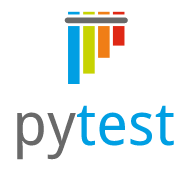

## Using `pytest` and `ipytest`

The most popular and powerful testing framework in Python is called `pytest`.

Here is a function:

```python
def loud_string(s: str) -> str:
    """Returns the string, 's', as uppercase and with an exclamation point at the end."""
    loud = f"{s.upper()}!"
    return loud
```

And here is a function that tests our above function:

```python
def test_load_string(): # The basic test takes no arguments
    assert loud_string('hello') == "HELLO!"
    assert loud_string('') == '!' # Test case for an empty string
    assert loud_string('123') == '123!' # Test case for no letters
```

> `assert` is a statement that does nothing if the expression following it evaluates to `True`. It raises an `AssertionError` if the expression evaluates to `False`

**pytest uses these test functions to test your code**

### Using pytest in JupyterLab: `ipytest`

Pytest is commonly used as a command line utility.

To use pytest within Jupyter, we use `ipytest`.

Because we have already installed `ipytest`, we can just import it into a notebook and run the `autoconfig()`:

```python
import ipytest
ipytest.autoconfig()
```

# An Example

Here is an example for a function that adds numbers in two lists together as though they were a vector.

We will write a test to validate the function result for adding two lists of `float` (with positive and negative values) and two empty lists.

```python
def vector_add(v1: list[float], v2: list[float]) -> list[float]:
    """
    Returns a list representing the vector sum of the lists 'v1' and 'v2'.
    Both 'v1' and 'v2' must be the same length and must contain only numbers,
    either float or int.
    """
    v_result = []
    for idx, item in enumerate(v1):
        new_item = item + v2[idx]
        v_result.append(new_item)
    return v_result


def test_vector_add():
    assert vector_add([1., 2., 3.], [-1., 1., -1.]) == [0., 3., 2.]
    assert vector_add([], []) == [] # Test the empty lists
    
ipytest.run()
```

Have we tested everything we need to test?

# Try writing some functions (with tests)!

## 1. Create a rectangle from width and depth

Design a function that takes two parameters:
1. `b`, the width of a rectangle
2. `d`, the depth of a rectangle

The function will return a tuples of four (x, y) coordinates. These coordinates will be the `(min_x`, `min_y`, `max_x`, `max_y)` points of the rectangle.

Write tests for the function. The tests should include:
1. A rectangle with a positive width/depth
2. A rectangle with a negative width/depth
3. A rectangle with a zero width and zero depth

In [3]:
def create_rectangle(b:float,d:float) -> list[tuple]:
    """
    Returns a list of (x.y) coordinates that represent the corner points of a rectangle of
    width 'b' & depth 'd'. The coordinates represents the (min_x, min_y, max_x, max_y).
    """
    min_x = 0
    min_y = 0
    max_x = b
    max_y = d
    return (min_x, min_y, max_x, max_y)
    

In [4]:
create_rectangle (200,500)

(0, 0, 200, 500)

## 2. Alter size of rectangle

Design a function that takes two parameters:

1. A tuple representing the coordinates of a rectangle as described by `(min_x, min_y, max_x, max_y)`
2. A float which represents the offset by which to expand or contract our rectangle by

The function is to return a `tuple` representing the rectangle expanded or contracted, both from left and right, top and bottom equally by the amount of the offset.

Your test cases should include: 
1. A test for a positive offset (expansion by the same distance on all sides)
2. A test for a negative offset (contraction by the same distance on all sides)
3. A test for zero offset

In [20]:
def resize_rectangle(coordinates:tuple[float], offset:float) -> tuple:
    """
    Returns an adjusted list of (x,y) coordinates that represent the corner points of a rectangle of.
    The coordinates represents the (min_x, min_y, max_x, max_y).
    """
    min_x = coordinates[0] - offset
    min_y = coordinates[1] - offset
    max_x = coordinates[2] + offset
    max_y = coordinates[3] + offset
    return (min_x, min_y, max_x, max_y)
    

In [21]:
resize_rectangle((0,0,200,500), 5)

(-5, -5, 205, 505)

## 3. Midpoint of a line segment

Design a function that takes two parameters:
 1. `p1` a tuple of an (x, y) coordinate representing the start point of a line segment
 2. `p2` a tuple of an (x, y) coordinate representing the end point of a line segment
 
Your function is to return a `tuple` of an (x, y) coordinate which represents the calculated mid-point of the line segment.

Your tests cases should include:

1. A test for when `p1` is to the left and down of `p2`
2. A test for when `p1` is to the right and up of `p2`
4. A test where the start point and end point are the same

In [23]:
def midpoint_line(start:tuple[float], end:tuple[float]) -> tuple[float]:
    """
    Returns an (x,y) coordinates that represent the midpoint of the line segment.
    """
    mid_x = (start[0] + end[0])/2
    mid_y = (start[1] + end[1])/2
    return (mid_x, mid_y)

## 4. Reinforced concrete beam section with three bars

Using the functions you have written in **1.**, **2.**, and **3.** as "helper" functions, design a function that takes the following parameters:

1. Width of a rectangular concrete section
2. Depth of a rectangular concrete section
3. A float representing the concrete clear cover
4. The diameter of a round reinforcing bar

The function is going to return a `list` of three tuples, each tuple being an (x, y) coordinate which represents the centroid of a round reinforcing bar that has been placed in the concrete outline with the proper clear cover at the _bottom_ of the concrete section (like a beam).

Your test cases should include:

1. One concrete section with reinforcing bars

In [26]:
def centroid_bars(width:float, depth:float, cover:float, bar_diameter:float) -> list[tuple[float]]:
    """
    Returns a list of (x,y) coordinates that represents the centroid of round rebars with cover at bottom
    of the concrete section.
    """
    clear_cover = cover - bar_diameter/2
    x_1 = clear_cover + bar_diameter/2
    x_2 = width/2
    x_3 = width - clear_cover - bar_diameter/2
    y = depth - clear_cover - bar_diameter/2
    return [(x_1, y),(x_2, y),(x_3, y)]